# Unzip archivos

# Carga del modelo

In [1]:
from transformers import BertForSequenceClassification, AutoTokenizer

model_directory = '../input/val-data/modelo'

model = BertForSequenceClassification.from_pretrained(model_directory)
tokenizer = AutoTokenizer.from_pretrained('nlpaueb/bert-base-greek-uncased-v1')

# Carga del dataset

In [2]:
import pandas as pd

# OJO que hay textos duplicados
data_path = '../input/val-data/val_df.csv'

df = pd.read_csv(data_path, delimiter='>')

print(df.head())
print(df.describe())

                  Autor                                          Obra  \
0  Eusebius of Caesarea  De Martyribus Palaestinae (Recensio Brevior)   
1  Eusebius of Caesarea  De Martyribus Palaestinae (Recensio Brevior)   
2  Eusebius of Caesarea  De Martyribus Palaestinae (Recensio Brevior)   
3  Eusebius of Caesarea  De Martyribus Palaestinae (Recensio Brevior)   
4  Eusebius of Caesarea  De Martyribus Palaestinae (Recensio Brevior)   

  Fragmento                                              Texto  
0         1  πρωτος τοιγαρουν των επι παλαιστινης μαρτυρων ...  
1         1  πρωτος τοιγαρουν των επι παλαιστινης μαρτυρων ...  
2         2  δεσιου μηνος εβδομη, προ επτα ειδων ιουνιων λε...  
3         3  μετα δε τουτο επι της αυτης πολεως πλειστοι οσ...  
4         4  ομως δε ουν εφερον το αποβαν ακολουθως ταις απ...  
            Autor     Obra Fragmento  \
count        4292     4292      4292   
unique         13       34      1514   
top     Euripides  Bacchae         1   
freq       

In [3]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.head()

,Autor,Obra,Fragmento,Texto
0,Eusebius of Caesarea,De Martyribus Palaestinae (Recensio Brevior),1,πρωτος τοιγαρουν των επι παλαιστινης μαρτυρων ...
1,Eusebius of Caesarea,De Martyribus Palaestinae (Recensio Brevior),1,πρωτος τοιγαρουν των επι παλαιστινης μαρτυρων ...
2,Eusebius of Caesarea,De Martyribus Palaestinae (Recensio Brevior),2,"δεσιου μηνος εβδομη, προ επτα ειδων ιουνιων λε..."
3,Eusebius of Caesarea,De Martyribus Palaestinae (Recensio Brevior),3,μετα δε τουτο επι της αυτης πολεως πλειστοι οσ...
4,Eusebius of Caesarea,De Martyribus Palaestinae (Recensio Brevior),4,ομως δε ουν εφερον το αποβαν ακολουθως ταις απ...


In [4]:
for autor in df.Autor.unique():
    print(autor)
    for obra in df[df.Autor==autor].Obra.unique():
        print('\t'+obra)

        

Eusebius of Caesarea
	De Martyribus Palaestinae (Recensio Brevior)
Demosthenes
	For the Megalopolitans
	Against Evergus and Mnesibulus
	Philippic 2
	Against Onetor
	Philip
Isocrates
	Against Callimachus
	To Philip
Aristophanes
	Acharnians
Theophrastus
	DeLapidibus
	DeNervorumResolutione
Lysias
	For the Soldier
	Against Theomnestus 1
	Against Diogeiton
Aristotle
	deInterpretatione
	Meteorologica
	DePartibusAnimalium
Plutarch
	Cleomenes
Euripides
	Bacchae
Appian
	Sicily and the Other Islands
Hippocrates
	De glandulis
	De muliebribus
	De haemorrhoidibus
	Iusiurandum
	De affectionibus
Plato
	Theages
	Timaeus
	Crito
	Protagoras
Lucian
	Macrobii
	Toxaris vel amicitia
	Deorum Concilium
	De Syria Dea
	Nigrinus


# Interpreter

In [5]:
!pip install transformers-interpret

In [6]:
# https://github.com/cdpierse/transformers-interpret
from transformers import AutoTokenizer
from transformers_interpret import SequenceClassificationExplainer
import torch
import json
from tqdm import tqdm
from scipy.special import softmax
import numpy as np
import matplotlib.pyplot as plt

In [7]:
with open('../input/val-data/labels_encoder.json', 'r') as f:
    json_dict = f.read()
    label_encoder = json.loads(json_dict)
print(label_encoder)

{'Xenophon': 0, 'Pseudo-Xenophon': 1, 'Hyperides': 2, 'Lycurgus': 3, 'Eusebius of Caesarea': 4, 'Demosthenes': 5, 'Homer': 6, 'Sophocles': 7, 'Isocrates': 8, 'Aristophanes': 9, 'Theophrastus': 10, 'Julian the Emperor': 11, 'Herodotus': 12, 'Strabo': 13, 'Aeschines': 14, 'Pausanias': 15, 'Andocides': 16, 'Antiphon': 17, 'Dinarchus': 18, 'Arrian': 19, 'Callimachus': 20, 'Lysias': 21, 'Apollonius Rhodius': 22, 'Thucydides': 23, 'Philostratus the Athenian': 24, 'Aristotle': 25, 'John, of Damascus (attributed author)': 26, 'Aeschylus': 27, 'Theocritus': 28, 'Apollodorus': 29, 'Plutarch': 30, 'Euripides': 31, 'Polybius': 32, 'Athenaeus': 33, 'Aelian': 34, 'Dionysius of Halicarnassus': 35, 'Procopius': 36, 'Appian': 37, 'Hippocrates': 38, 'Plato': 39, 'Basil, Saint, Bishop of Caesarea': 40, 'Aeneas Tacticus': 41, 'Asclepiodotus': 42, 'Quintus Smyrnaeus': 43, 'Clement of Alexandria': 44, 'Nonnus of Panopolis': 45, 'Cassius Dio Cocceianus': 46, 'Longinus': 47, 'Marcus Aurelius': 48, 'Longus': 4

In [19]:
class TextPredictor():
    def __init__(self, df, text_name, author, model=model, tokenizer=tokenizer, encoder=label_encoder, eval_mode ='interpreter'):
        self.df = df
        self.text = text_name
        self.author = author
        self.model=model
        self.tokenizer = tokenizer
        self.encoder = encoder
        self.eval_mode = eval_mode
        self.predicted_author = None

        if self.eval_mode == 'model':
            self.model = model.cpu()
        elif self.eval_mode == 'interpreter':
            self.model = model.cuda()

        
    def fragment(self, n):
        n = n
        text_list = self.df[self.df.Obra == self.text].Texto.to_list()
        text = ' '.join(text_list)
        #print(text)
        splitted_text = text.split()
        text_chunks = [' '.join(splitted_text[i:i+n]) for i in range(0,len(splitted_text),n)]
        return text_chunks

    def predict(self, n=200):
        predictions = self.init_prediction_dict()
        for text in tqdm(self.fragment(n)):
            
            if self.eval_mode == 'interpreter':
                interpreter = SequenceClassificationExplainer(self.model, self.tokenizer)
                prediction = interpreter(text)
                #print(f'Prediction: {prediction}\n\n')
                predicted_label=int(interpreter.predicted_class_name.split('_')[-1])
                #print(predicted_label)
                predicted_accuracy = sum([i for _,i in prediction])
                #print(predicted_accuracy)
                #interpreter.visualize()
                for autor,label in self.encoder.items():
                    if label == predicted_label:
                        predictions[autor].append(predicted_accuracy)
                    else:
                        predictions[autor].append(0)
                        
            elif self.eval_mode == 'model':
                tokenized_text = self.tokenizer(text, return_tensors = 'pt')
                prediction = self.model(**tokenized_text)
                prediction = prediction.logits
                prediction = prediction.detach()
                prediction = prediction.numpy()[0]
                prediction = softmax(prediction)
                
                for autor, label in self.encoder.items():
                    predictions[autor].append(prediction[label])
    
        self.show_predictions(predictions)            
            
            
    def show_predictions(self, predictions, top=5):
        
        authors_list = []
        values_list = []
        print(f'Text: {self.text}')
        print(f'True author: {self.author}')
        confidence_dict = self.confidence(predictions)
        pred_author = max(confidence_dict, key=confidence_dict.get)
        pred_conf = confidence_dict[pred_author]
        print(f'\tPrediction: {pred_author}\n\tConfidence: {round(pred_conf,3)}%')
        authors_list.append(pred_author)
        values_list.append(pred_conf)
        self.predicted_author = pred_author
        
        del confidence_dict[pred_author]
        
        for i in range(top-1):
            pred_author = max(confidence_dict, key=confidence_dict.get)
            pred_conf = confidence_dict[pred_author]
            authors_list.append(pred_author)
            values_list.append(pred_conf)
            print(f'\t\tAlternative prediction: {pred_author}\n\t\tConfidence: {round(pred_conf,3)}%')
            del confidence_dict[pred_author]
            
        self.pieplot(authors_list, values_list)

    def init_prediction_dict(self):
        pred_dict = {}
        for autor in self.encoder.keys():
            pred_dict[autor] = []
        return pred_dict
    
    def confidence(self, predictions):
        '''
        Ver si tiene sentido hacerlo para interpreter y model igual
        '''
        predictions_temp = {} # {Autor: val}
    
        for autor, list_prob in predictions.items():
            if self.eval_mode == 'interpreter':
                predictions_temp[autor] = sum(list_prob)
            elif self.eval_mode == 'model':
                predictions_temp[autor] = np.mean(list_prob)
        
        sum_conf = sum(predictions_temp.values())
        
        predictions_final = {autor: conf/sum_conf * 100 for autor, conf in predictions_temp.items()}
                
        return predictions_final
    
    def interpret(self):
        if self.eval_mode == 'model':
            self.model = model.cuda()
        for chunk in self.chunks:
            interpreter = SequenceClassificationExplainer(self.model, self.tokenizer)
            prediction = interpreter(chunk)
            interpreter.visualize()
        if self.eval_mode == 'interpreter':
            self.model = model.cpu()
            
    def pieplot(self, authors_list, values_list):
        
        def make_autopct(values):
            def my_autopct(pct): 
                total = sum(values)
                val = round(pct*total/100.0,2)
                if val == 0:
                    return ''
                return f'{val}%' 
            return my_autopct
        
        sizes = values_list
        labels = authors_list
        exploding_value = len(labels)/75
        explode = [exploding_value-i for i in np.arange(0.0,exploding_value,exploding_value/len(labels))]
    
        fig1, ax1 = plt.subplots(figsize=(5,5))
        w,l,p = ax1.pie(sizes, explode= explode, labels=labels, labeldistance=None,autopct=make_autopct(sizes),
                shadow=True, startangle=90, pctdistance=0.8, normalize=None)
        
        pctdists = [1.-i for i in np.arange(0.1, 1., 1/len(labels))]
        for t,d in zip(p, pctdists):
            xi,yi = t.get_position()
            ri = np.sqrt(xi**2+yi**2)
            phi = np.arctan2(yi,xi)
            x = d*ri*np.cos(phi)
            y = d*ri*np.sin(phi)
            t.set_position((x,y))
        
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.legend(title = 'Predicted authors:')
        plt.show()

100%|██████████| 68/68 [00:56<00:00,  1.21it/s]


Text: De Martyribus Palaestinae (Recensio Brevior)
True author: Eusebius of Caesarea
	Prediction: Eusebius of Caesarea
	Confidence: 99.297%
		Alternative prediction: Clement of Alexandria
		Confidence: 0.353%
		Alternative prediction: Plato
		Confidence: 0.075%
		Alternative prediction: Lucian
		Confidence: 0.064%
		Alternative prediction: Appian
		Confidence: 0.026%


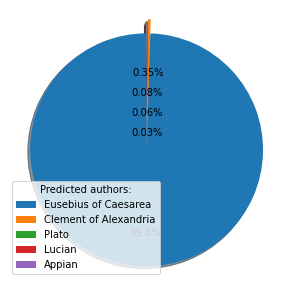

  0%|          | 0/7 [00:00<?, ?it/s]

Éxito con De Martyribus Palaestinae (Recensio Brevior), el autor es Eusebius of Caesarea y el modelo predijo Eusebius of Caesarea


100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


Text: For the Megalopolitans
True author: Demosthenes
	Prediction: Demosthenes
	Confidence: 96.388%
		Alternative prediction: Strabo
		Confidence: 0.457%
		Alternative prediction: Dionysius of Halicarnassus
		Confidence: 0.372%
		Alternative prediction: Aeschines
		Confidence: 0.359%
		Alternative prediction: Hyperides
		Confidence: 0.291%


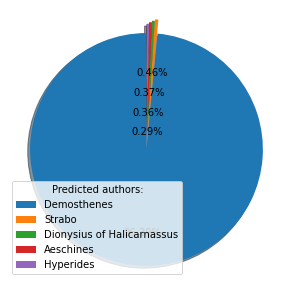

  0%|          | 0/20 [00:00<?, ?it/s]

Éxito con For the Megalopolitans, el autor es Demosthenes y el modelo predijo Demosthenes


100%|██████████| 22/22 [00:18<00:00,  1.20it/s]


Text: Against Evergus and Mnesibulus
True author: Demosthenes
	Prediction: Demosthenes
	Confidence: 76.738%
		Alternative prediction: Hyperides
		Confidence: 4.231%
		Alternative prediction: Andocides
		Confidence: 3.822%
		Alternative prediction: Aeschines
		Confidence: 3.048%
		Alternative prediction: Antiphon
		Confidence: 2.545%


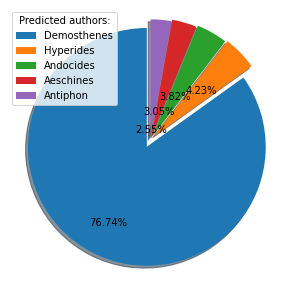

  0%|          | 0/8 [00:00<?, ?it/s]

Éxito con Against Evergus and Mnesibulus, el autor es Demosthenes y el modelo predijo Demosthenes


100%|██████████| 8/8 [00:06<00:00,  1.17it/s]


Text: Philippic 2
True author: Demosthenes
	Prediction: Demosthenes
	Confidence: 97.761%
		Alternative prediction: Dionysius of Halicarnassus
		Confidence: 0.367%
		Alternative prediction: Dio Chrysostom
		Confidence: 0.337%
		Alternative prediction: Strabo
		Confidence: 0.292%
		Alternative prediction: Hyperides
		Confidence: 0.183%


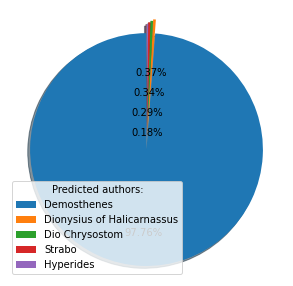

  0%|          | 0/13 [00:00<?, ?it/s]

Éxito con Philippic 2, el autor es Demosthenes y el modelo predijo Demosthenes


100%|██████████| 14/14 [00:12<00:00,  1.15it/s]


Text: Against Onetor
True author: Demosthenes
	Prediction: Demosthenes
	Confidence: 98.986%
		Alternative prediction: Hyperides
		Confidence: 0.219%
		Alternative prediction: Lysias
		Confidence: 0.115%
		Alternative prediction: Aeschines
		Confidence: 0.094%
		Alternative prediction: Antiphon
		Confidence: 0.081%


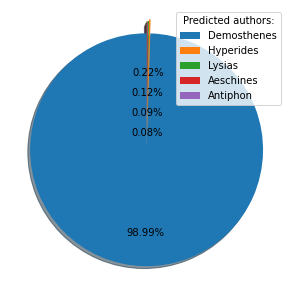

  0%|          | 0/6 [00:00<?, ?it/s]

Éxito con Against Onetor, el autor es Demosthenes y el modelo predijo Demosthenes


100%|██████████| 6/6 [00:04<00:00,  1.30it/s]


Text: Philip
True author: Demosthenes
	Prediction: Demosthenes
	Confidence: 38.421%
		Alternative prediction: Dionysius of Halicarnassus
		Confidence: 25.012%
		Alternative prediction: Lycurgus
		Confidence: 9.407%
		Alternative prediction: Isocrates
		Confidence: 5.581%
		Alternative prediction: Aeschines
		Confidence: 4.612%


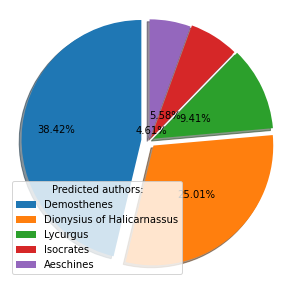

  0%|          | 0/1 [00:00<?, ?it/s]

Éxito con Philip, el autor es Demosthenes y el modelo predijo Demosthenes


100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


Text: Against Callimachus
True author: Isocrates
	Prediction: Lysias
	Confidence: 89.84%
		Alternative prediction: Demosthenes
		Confidence: 6.036%
		Alternative prediction: Isocrates
		Confidence: 1.202%
		Alternative prediction: Andocides
		Confidence: 0.909%
		Alternative prediction: Lycurgus
		Confidence: 0.515%


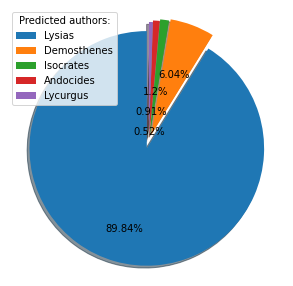

100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


Text: To Philip
True author: Isocrates
	Prediction: Isocrates
	Confidence: 97.524%
		Alternative prediction: Lycurgus
		Confidence: 0.438%
		Alternative prediction: Demosthenes
		Confidence: 0.374%
		Alternative prediction: Lysias
		Confidence: 0.279%
		Alternative prediction: Hyperides
		Confidence: 0.229%


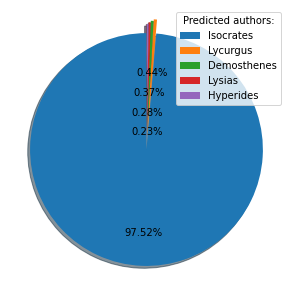

  0%|          | 0/27 [00:00<?, ?it/s]

Éxito con To Philip, el autor es Isocrates y el modelo predijo Isocrates


100%|██████████| 29/29 [00:24<00:00,  1.18it/s]


Text: Acharnians
True author: Aristophanes
	Prediction: Athenaeus
	Confidence: 34.319%
		Alternative prediction: Philostratus the Athenian
		Confidence: 14.295%
		Alternative prediction: Demosthenes
		Confidence: 11.24%
		Alternative prediction: Lucian
		Confidence: 10.198%
		Alternative prediction: Callimachus
		Confidence: 7.534%


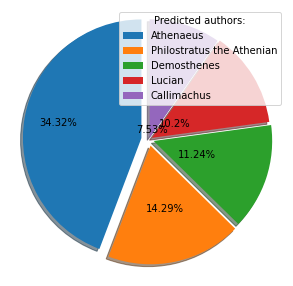

100%|██████████| 12/12 [00:09<00:00,  1.22it/s]


Text: DeLapidibus
True author: Theophrastus
	Prediction: Theophrastus
	Confidence: 99.848%
		Alternative prediction: Aristotle
		Confidence: 0.082%
		Alternative prediction: Isocrates
		Confidence: 0.006%
		Alternative prediction: Lucian
		Confidence: 0.005%
		Alternative prediction: Athenaeus
		Confidence: 0.005%


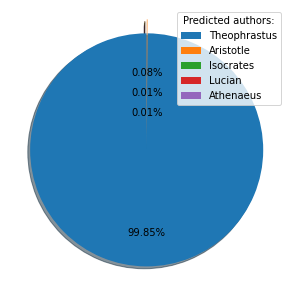

  0%|          | 0/1 [00:00<?, ?it/s]

Éxito con DeLapidibus, el autor es Theophrastus y el modelo predijo Theophrastus


100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


Text: DeNervorumResolutione
True author: Theophrastus
	Prediction: Theophrastus
	Confidence: 99.645%
		Alternative prediction: Aristotle
		Confidence: 0.246%
		Alternative prediction: Lucian
		Confidence: 0.024%
		Alternative prediction: Clement of Alexandria
		Confidence: 0.01%
		Alternative prediction: Hippocrates
		Confidence: 0.009%


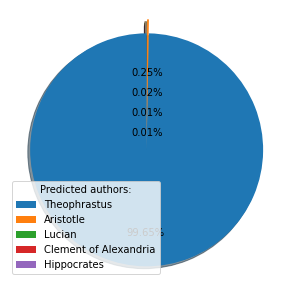

  0%|          | 0/4 [00:00<?, ?it/s]

Éxito con DeNervorumResolutione, el autor es Theophrastus y el modelo predijo Theophrastus


100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Text: For the Soldier
True author: Lysias
	Prediction: Lysias
	Confidence: 17.965%
		Alternative prediction: Andocides
		Confidence: 15.683%
		Alternative prediction: Dio Chrysostom
		Confidence: 12.866%
		Alternative prediction: Dionysius of Halicarnassus
		Confidence: 9.734%
		Alternative prediction: Hyperides
		Confidence: 7.713%


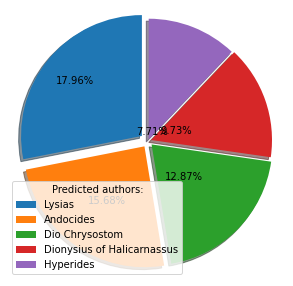

Éxito con For the Soldier, el autor es Lysias y el modelo predijo Lysias


100%|██████████| 6/6 [00:05<00:00,  1.14it/s]


Text: Against Theomnestus 1
True author: Lysias
	Prediction: Demosthenes
	Confidence: 41.577%
		Alternative prediction: Lysias
		Confidence: 12.672%
		Alternative prediction: Andocides
		Confidence: 12.298%
		Alternative prediction: Lucian
		Confidence: 10.054%
		Alternative prediction: Hyperides
		Confidence: 6.783%


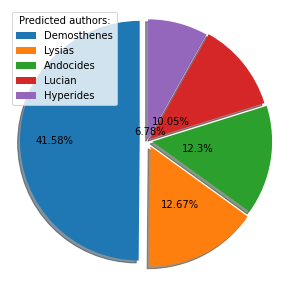

100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


Text: Against Diogeiton
True author: Lysias
	Prediction: Demosthenes
	Confidence: 41.832%
		Alternative prediction: Dionysius of Halicarnassus
		Confidence: 22.691%
		Alternative prediction: Andocides
		Confidence: 9.363%
		Alternative prediction: Lysias
		Confidence: 8.092%
		Alternative prediction: Hyperides
		Confidence: 5.033%


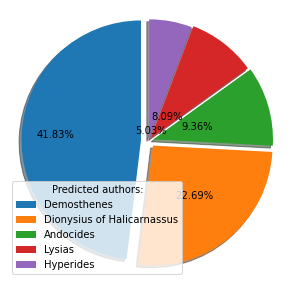

100%|██████████| 23/23 [00:17<00:00,  1.34it/s]


Text: deInterpretatione
True author: Aristotle
	Prediction: Aristotle
	Confidence: 99.58%
		Alternative prediction: Plato
		Confidence: 0.147%
		Alternative prediction: Theophrastus
		Confidence: 0.113%
		Alternative prediction: Demetrius of Phaleron (attributed author)
		Confidence: 0.03%
		Alternative prediction: Marcus Aurelius
		Confidence: 0.016%


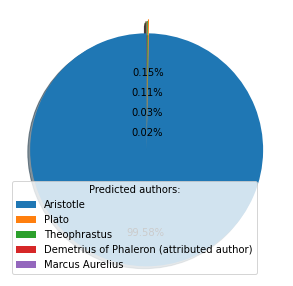

  0%|          | 0/116 [00:00<?, ?it/s]

Éxito con deInterpretatione, el autor es Aristotle y el modelo predijo Aristotle


100%|██████████| 125/125 [01:37<00:00,  1.28it/s]


Text: Meteorologica
True author: Aristotle
	Prediction: Aristotle
	Confidence: 73.728%
		Alternative prediction: Theophrastus
		Confidence: 25.463%
		Alternative prediction: Lucian
		Confidence: 0.151%
		Alternative prediction: Plato
		Confidence: 0.108%
		Alternative prediction: Hippocrates
		Confidence: 0.091%


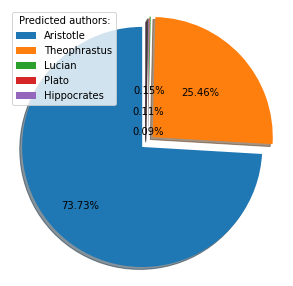

  0%|          | 0/244 [00:00<?, ?it/s]

Éxito con Meteorologica, el autor es Aristotle y el modelo predijo Aristotle


100%|██████████| 244/244 [03:28<00:00,  1.17it/s]


Text: DePartibusAnimalium
True author: Aristotle
	Prediction: Aristotle
	Confidence: 78.286%
		Alternative prediction: Theophrastus
		Confidence: 21.171%
		Alternative prediction: Demetrius of Phaleron (attributed author)
		Confidence: 0.111%
		Alternative prediction: Hippocrates
		Confidence: 0.066%
		Alternative prediction: Plato
		Confidence: 0.045%


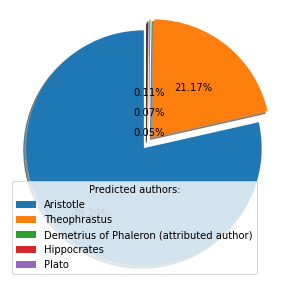

  0%|          | 0/34 [00:00<?, ?it/s]

Éxito con DePartibusAnimalium, el autor es Aristotle y el modelo predijo Aristotle


100%|██████████| 36/36 [00:31<00:00,  1.13it/s]


Text: Cleomenes
True author: Plutarch
	Prediction: Dio Chrysostom
	Confidence: 21.276%
		Alternative prediction: Plutarch
		Confidence: 17.586%
		Alternative prediction: Dionysius of Halicarnassus
		Confidence: 15.574%
		Alternative prediction: Strabo
		Confidence: 14.452%
		Alternative prediction: Athenaeus
		Confidence: 8.981%


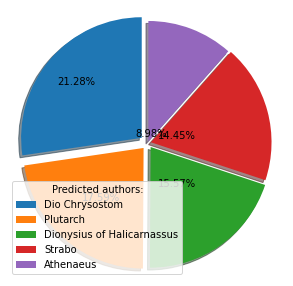

100%|██████████| 33/33 [00:25<00:00,  1.31it/s]


Text: Bacchae
True author: Euripides
	Prediction: Theocritus
	Confidence: 34.27%
		Alternative prediction: Euripides
		Confidence: 8.417%
		Alternative prediction: Callimachus
		Confidence: 7.477%
		Alternative prediction: Nonnus of Panopolis
		Confidence: 6.81%
		Alternative prediction: Philostratus the Athenian
		Confidence: 5.324%


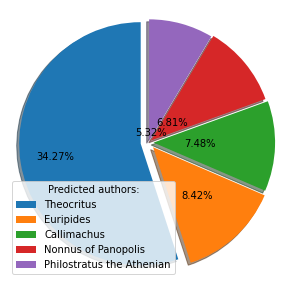

100%|██████████| 9/9 [00:07<00:00,  1.18it/s]


Text: Sicily and the Other Islands
True author: Appian
	Prediction: Appian
	Confidence: 88.507%
		Alternative prediction: Cassius Dio Cocceianus
		Confidence: 9.825%
		Alternative prediction: Dionysius of Halicarnassus
		Confidence: 1.245%
		Alternative prediction: Theophrastus
		Confidence: 0.048%
		Alternative prediction: Plutarch
		Confidence: 0.044%


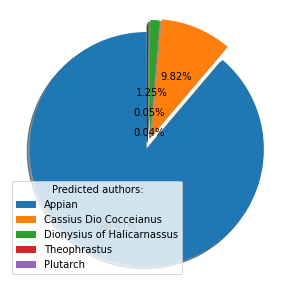

  0%|          | 0/3 [00:00<?, ?it/s]

Éxito con Sicily and the Other Islands, el autor es Appian y el modelo predijo Appian


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Text: De glandulis
True author: Hippocrates
	Prediction: Hippocrates
	Confidence: 73.263%
		Alternative prediction: Theophrastus
		Confidence: 19.072%
		Alternative prediction: Aristophanes
		Confidence: 3.318%
		Alternative prediction: Polybius
		Confidence: 1.252%
		Alternative prediction: Aristotle
		Confidence: 0.668%


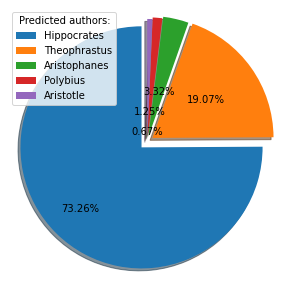

  0%|          | 0/342 [00:00<?, ?it/s]

Éxito con De glandulis, el autor es Hippocrates y el modelo predijo Hippocrates


100%|██████████| 449/449 [05:28<00:00,  1.37it/s]


Text: De muliebribus
True author: Hippocrates
	Prediction: Hippocrates
	Confidence: 99.887%
		Alternative prediction: Philostratus The Athenian
		Confidence: 0.022%
		Alternative prediction: Aristotle
		Confidence: 0.006%
		Alternative prediction: Callimachus
		Confidence: 0.005%
		Alternative prediction: Lucian
		Confidence: 0.005%


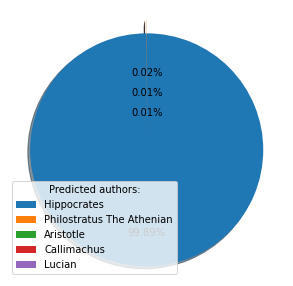

  0%|          | 0/4 [00:00<?, ?it/s]

Éxito con De muliebribus, el autor es Hippocrates y el modelo predijo Hippocrates


100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


Text: De haemorrhoidibus
True author: Hippocrates
	Prediction: Hippocrates
	Confidence: 99.899%
		Alternative prediction: Philostratus The Athenian
		Confidence: 0.02%
		Alternative prediction: Aristotle
		Confidence: 0.005%
		Alternative prediction: Callimachus
		Confidence: 0.004%
		Alternative prediction: Appian
		Confidence: 0.004%


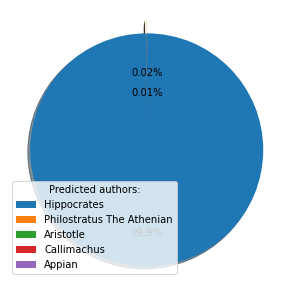

  0%|          | 0/2 [00:00<?, ?it/s]

Éxito con De haemorrhoidibus, el autor es Hippocrates y el modelo predijo Hippocrates


100%|██████████| 2/2 [00:01<00:00,  1.64it/s]


Text: Iusiurandum
True author: Hippocrates
	Prediction: Hippocrates
	Confidence: 99.35%
		Alternative prediction: Philostratus The Athenian
		Confidence: 0.263%
		Alternative prediction: Lucian
		Confidence: 0.082%
		Alternative prediction: Callimachus
		Confidence: 0.034%
		Alternative prediction: Theocritus
		Confidence: 0.023%


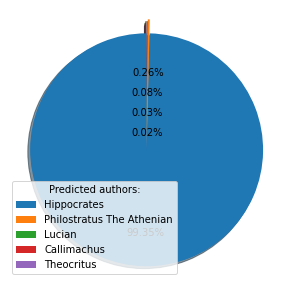

  0%|          | 0/30 [00:00<?, ?it/s]

Éxito con Iusiurandum, el autor es Hippocrates y el modelo predijo Hippocrates


100%|██████████| 33/33 [00:26<00:00,  1.25it/s]


Text: De affectionibus
True author: Hippocrates
	Prediction: Hippocrates
	Confidence: 99.906%
		Alternative prediction: Philostratus The Athenian
		Confidence: 0.017%
		Alternative prediction: Aristotle
		Confidence: 0.006%
		Alternative prediction: Callimachus
		Confidence: 0.004%
		Alternative prediction: Lucian
		Confidence: 0.004%


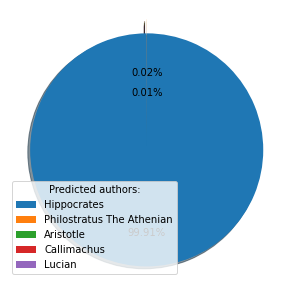

  0%|          | 0/13 [00:00<?, ?it/s]

Éxito con De affectionibus, el autor es Hippocrates y el modelo predijo Hippocrates


100%|██████████| 16/16 [00:12<00:00,  1.30it/s]


Text: Theages
True author: Plato
	Prediction: Plato
	Confidence: 93.681%
		Alternative prediction: Aristophanes
		Confidence: 6.173%
		Alternative prediction: Sophocles
		Confidence: 0.031%
		Alternative prediction: Euripides
		Confidence: 0.025%
		Alternative prediction: Aeschylus
		Confidence: 0.011%


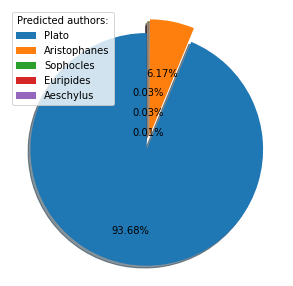

  0%|          | 0/95 [00:00<?, ?it/s]

Éxito con Theages, el autor es Plato y el modelo predijo Plato


100%|██████████| 95/95 [01:19<00:00,  1.20it/s]


Text: Timaeus
True author: Plato
	Prediction: Plato
	Confidence: 88.213%
		Alternative prediction: Clement of Alexandria
		Confidence: 3.5%
		Alternative prediction: Aristotle
		Confidence: 2.508%
		Alternative prediction: Theophrastus
		Confidence: 2.094%
		Alternative prediction: Eusebius of Caesarea
		Confidence: 1.508%


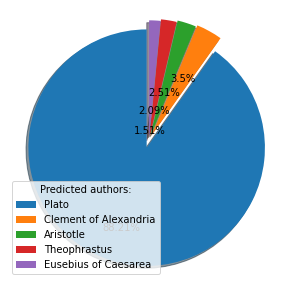

  0%|          | 0/17 [00:00<?, ?it/s]

Éxito con Timaeus, el autor es Plato y el modelo predijo Plato


100%|██████████| 17/17 [00:14<00:00,  1.16it/s]


Text: Crito
True author: Plato
	Prediction: Plato
	Confidence: 99.924%
		Alternative prediction: Xenophon
		Confidence: 0.009%
		Alternative prediction: Julian the Emperor
		Confidence: 0.005%
		Alternative prediction: Appian
		Confidence: 0.005%
		Alternative prediction: Aristotle
		Confidence: 0.004%


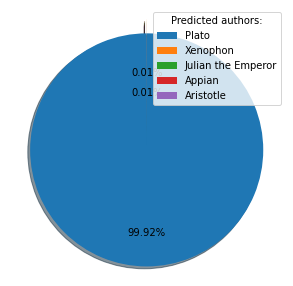

  0%|          | 0/74 [00:00<?, ?it/s]

Éxito con Crito, el autor es Plato y el modelo predijo Plato


100%|██████████| 90/90 [00:56<00:00,  1.59it/s]


Text: Protagoras
True author: Plato
	Prediction: Plato
	Confidence: 96.396%
		Alternative prediction: Lucian
		Confidence: 3.052%
		Alternative prediction: Aristotle
		Confidence: 0.083%
		Alternative prediction: Xenophon
		Confidence: 0.08%
		Alternative prediction: Appian
		Confidence: 0.077%


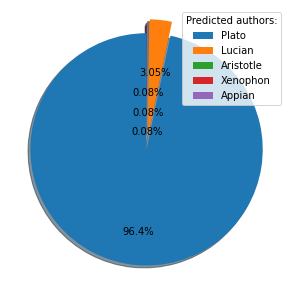

  0%|          | 0/9 [00:00<?, ?it/s]

Éxito con Protagoras, el autor es Plato y el modelo predijo Plato


100%|██████████| 9/9 [00:07<00:00,  1.17it/s]


Text: Macrobii
True author: Lucian
	Prediction: Lucian
	Confidence: 60.464%
		Alternative prediction: Plato
		Confidence: 13.38%
		Alternative prediction: Athenaeus
		Confidence: 6.668%
		Alternative prediction: Appian
		Confidence: 5.497%
		Alternative prediction: Aristotle
		Confidence: 4.077%


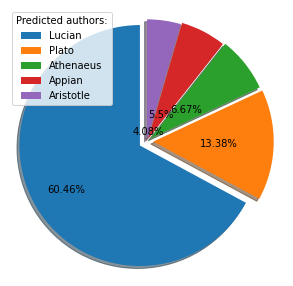

  0%|          | 0/37 [00:00<?, ?it/s]

Éxito con Macrobii, el autor es Lucian y el modelo predijo Lucian


100%|██████████| 40/40 [00:34<00:00,  1.18it/s]


Text: Toxaris vel amicitia
True author: Lucian
	Prediction: Lucian
	Confidence: 93.273%
		Alternative prediction: Herodotus
		Confidence: 1.611%
		Alternative prediction: Athenaeus
		Confidence: 0.898%
		Alternative prediction: John, of Damascus (attributed author)
		Confidence: 0.846%
		Alternative prediction: Dio Chrysostom
		Confidence: 0.744%


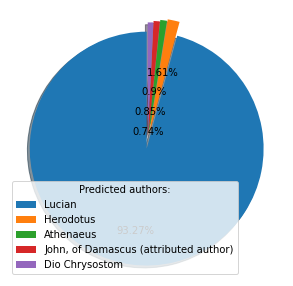

  0%|          | 0/8 [00:00<?, ?it/s]

Éxito con Toxaris vel amicitia, el autor es Lucian y el modelo predijo Lucian


100%|██████████| 8/8 [00:07<00:00,  1.12it/s]


Text: Deorum Concilium
True author: Lucian
	Prediction: Lucian
	Confidence: 94.751%
		Alternative prediction: Philostratus The Athenian
		Confidence: 4.096%
		Alternative prediction: Plato
		Confidence: 0.262%
		Alternative prediction: Philostratus the Athenian
		Confidence: 0.234%
		Alternative prediction: Aristotle
		Confidence: 0.085%


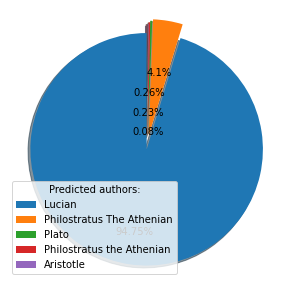

  0%|          | 0/24 [00:00<?, ?it/s]

Éxito con Deorum Concilium, el autor es Lucian y el modelo predijo Lucian


100%|██████████| 28/28 [00:23<00:00,  1.17it/s]


Text: De Syria Dea
True author: Lucian
	Prediction: Hippocrates
	Confidence: 68.565%
		Alternative prediction: Lucian
		Confidence: 25.833%
		Alternative prediction: Herodotus
		Confidence: 1.242%
		Alternative prediction: Philostratus The Athenian
		Confidence: 1.185%
		Alternative prediction: Eusebius of Caesarea
		Confidence: 0.499%


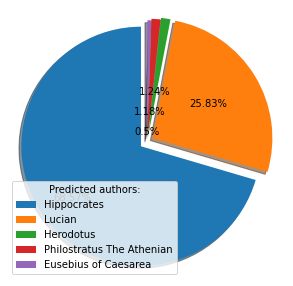

100%|██████████| 17/17 [00:14<00:00,  1.20it/s]


Text: Nigrinus
True author: Lucian
	Prediction: Lucian
	Confidence: 75.443%
		Alternative prediction: Plato
		Confidence: 14.903%
		Alternative prediction: Eusebius of Caesarea
		Confidence: 4.49%
		Alternative prediction: Philostratus The Athenian
		Confidence: 2.012%
		Alternative prediction: Dio Chrysostom
		Confidence: 1.237%


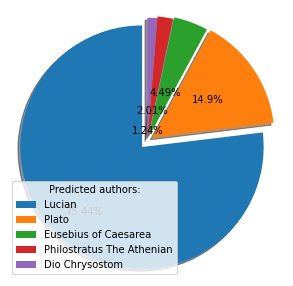

Éxito con Nigrinus, el autor es Lucian y el modelo predijo Lucian


In [22]:
texts_total = 0
correct_preds = 0
for author in df.Autor.unique():
    for obra in df[df.Autor==author].Obra.unique():
        texts_total += 1
        n=270
        while True:
            try:
                predictor=TextPredictor(df, obra, author, eval_mode='model')
                predictor.predict(n=n)
                if predictor.predicted_author == author:
                    correct_preds += 1 
                    print(f'Éxito con {obra}, el autor es {author} y el modelo predijo {predictor.predicted_author}')
                break
            except RuntimeError:
                n -= 20
                

In [23]:
accuracy_total = round(correct_preds/texts_total * 100, 2)
print(f'Model Accuracy: {accuracy_total}%')

Model Accuracy: 79.41%


In [25]:
print(correct_preds)
print(texts_total)

27
34
